<a href="https://colab.research.google.com/github/hangj11/006975/blob/master/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 파일 다운로드

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-20 01:53:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 74.125.129.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   173MB/s    in 0.4s    

2022-08-20 01:53:40 (173 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):    # 작업 디렉토리는 cats_and_dogs_filtered
    
    shutil.rmtree('/content/cats_and_dogs_filtered/')
    print('/content/cats_and_dogs_filtered/  is removed !!!')

In [4]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/') 

In [5]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

cats_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
dogs_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')

cats_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
dogs_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

print('cats train file nums = ', len(cats_train_list))
print('dogs train file nums = ', len(dogs_train_list))
print('cats validation file nums = ', len(cats_validation_list))
print('dogs validation file nums = ', len(cats_validation_list))
print('=================================================')

cats train file nums =  1000
dogs train file nums =  1000
cats validation file nums =  500
dogs validation file nums =  500


train 디렉토리에서 image data 읽어서 x_train, y_train 생성

In [6]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

train_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/'

train_label_list = os.listdir(train_base_dir)    # 정답이름

print('train label # => ', len(train_label_list))

start_time = datetime.now()

for train_label_name in train_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if train_label_name == 'cats':
        label_num = 0.0
    elif train_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = train_base_dir + train_label_name

    train_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for train_img_file in train_img_file_list:

        train_img = cv2.imread(train_img_file, cv2.IMREAD_COLOR) 

        train_img = cv2.resize(train_img, dsize=(224,224))    # (224,224) 변환

        train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

        image_list.append(train_img)
        label_list.append(label_num) 

# numpy 변환

x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

end_time = datetime.now()

print('train data generation time => ', end_time-start_time)

train label # =>  2
x_train.shape =  (2000, 224, 224, 3) , y_train.shape =  (2000,)
train data generation time =>  0:00:04.790014


validation 디렉토리로부터 이미지 읽어서 x_val, y_val 생성

In [7]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

validation_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/'

validation_label_list = os.listdir(validation_base_dir)    # 정답이름

print('validation label # => ', len(validation_label_list))

start_time = datetime.now()

for validation_label_name in validation_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if validation_label_name == 'cats':
        label_num = 0.0
    elif validation_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = validation_base_dir + validation_label_name

    validation_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for validation_img_file in validation_img_file_list:

        validation_img = cv2.imread(validation_img_file, cv2.IMREAD_COLOR) 

        validation_img = cv2.resize(validation_img, dsize=(224,224))    # (224,224) 변환

        validation_img = cv2.cvtColor(validation_img, cv2.COLOR_BGR2RGB)

        image_list.append(validation_img)
        label_list.append(label_num)

# numpy 변환

x_val = np.array(image_list).astype('float32')
y_val = np.array(label_list).astype('float32')

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)

end_time = datetime.now()

print('validation data generation time => ', end_time-start_time)

validation label # =>  2
x_val.shape =  (1000, 224, 224, 3) , y_val.shape =  (1000,)
validation data generation time =>  0:00:02.430043


validation data 로 부터 test data 분리 (분리 비율 5 : 5)

In [8]:
import numpy as np

# validation data random shuffle

s = np.arange(len(x_val))

# index random shuffle

np.random.shuffle(s)

# x_val, y_val 재 생성

x_val = x_val[s]
y_val = y_val[s]

# validation, test data 분리
ratio = 0.5

split_num = int(ratio*len(x_val))

print('split num => ', split_num)

x_test = x_val[0:split_num]
y_test = y_val[0:split_num]

x_val = x_val[split_num:]
y_val = y_val[split_num:]

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

split num =>  500
x_val.shape =  (500, 224, 224, 3) , y_val.shape =  (500,)
x_test.shape =  (500, 224, 224, 3) , y_test.shape =  (500,)


이미지 데이터 정규화

In [9]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

## TO-DO

## 전이학습을 위한 MobileNet 모델 구축 

In [11]:
from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet, MobileNetV2

In [12]:
base_model = MobileNet(weights = 'imagenet', include_top =False, input_shape=(224,224,3))

base_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [14]:
model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 16)                802832    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 4,031,730
Trainable params: 4,009,842
Non-trainable params: 21,888
_________________________________________

In [41]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(3e-5), metrics=['acc'])

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name ='./cats_and_dogs_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name, 
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto'
                             )

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              )

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=10, batch_size=16,
                validation_data = (x_val, y_val))

end_time=datetime.now()

print('Elapsed Time =>', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 31s 194ms/step - loss: 0.2700 - acc: 0.8895 - val_loss: 0.7742 - val_acc: 0.5080
Epoch 2/10
125/125 [==============================] - 23s 185ms/step - loss: 0.0479 - acc: 0.9825 - val_loss: 2.7080 - val_acc: 0.4960
Epoch 3/10
125/125 [==============================] - 23s 187ms/step - loss: 0.0240 - acc: 0.9920 - val_loss: 0.9469 - val_acc: 0.4520
Epoch 4/10
125/125 [==============================] - 24s 188ms/step - loss: 0.0268 - acc: 0.9930 - val_loss: 1.3377 - val_acc: 0.5160
Epoch 5/10
125/125 [==============================] - 24s 190ms/step - loss: 0.0158 - acc: 0.9945 - val_loss: 2.3933 - val_acc: 0.5540
Epoch 6/10
125/125 [==============================] - 24s 190ms/step - loss: 0.0089 - acc: 0.9970 - val_loss: 0.6363 - val_acc: 0.8460
Epoch 7/10
125/125 [==============================] - 24s 189ms/step - loss: 0.0104 - acc: 0.9965 - val_loss: 0.3116 - val_acc: 0.9380
Epoch 8/10
125/125 [==============================] - 2

In [44]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 2s 96ms/step - loss: 0.0534 - acc: 0.9740


[0.053432248532772064, 0.9739999771118164]

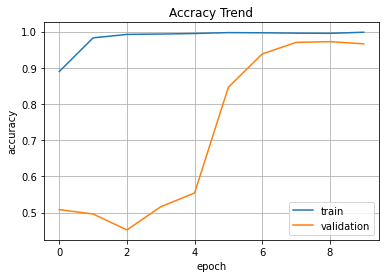

In [45]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'],label='train')
plt.plot(hist.history['val_acc'], label='validation')

plt.title('Accracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

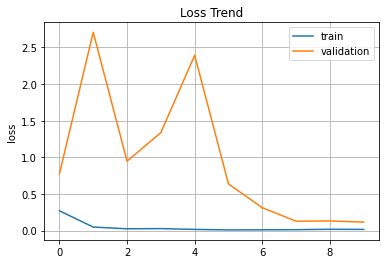

In [46]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.legend(loc='best')
plt.grid()
plt.show()

## 전이학습을 위한 MobileNetV2 모델 구축

In [23]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [24]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                1003536   
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,261,554
Trainable params: 3,227,442
Non-trainable params: 34,112
_______________________________________

In [47]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = '/cats_and_dogs_MobileNetV2_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto'
                             )
earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              )

start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                epochs=10, batch_size=16,
                validation_data =(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time =>', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 31s 196ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 0.2007 - val_acc: 0.9820
Epoch 2/10
125/125 [==============================] - 23s 187ms/step - loss: 0.0029 - acc: 0.9995 - val_loss: 0.2335 - val_acc: 0.9640
Epoch 3/10
125/125 [==============================] - 25s 197ms/step - loss: 0.0060 - acc: 0.9985 - val_loss: 0.1617 - val_acc: 0.9760
Epoch 4/10
125/125 [==============================] - 24s 190ms/step - loss: 0.0088 - acc: 0.9985 - val_loss: 0.1209 - val_acc: 0.9800
Epoch 5/10
125/125 [==============================] - 24s 194ms/step - loss: 0.0247 - acc: 0.9945 - val_loss: 0.1979 - val_acc: 0.9660
Epoch 6/10
125/125 [==============================] - 24s 195ms/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0849 - val_acc: 0.9800
Epoch 7/10
125/125 [==============================] - 24s 194ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0739 - val_acc: 0.9840
Epoch 8/10
125/125 [==============================] - 2

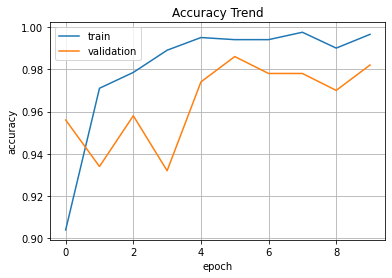

In [34]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

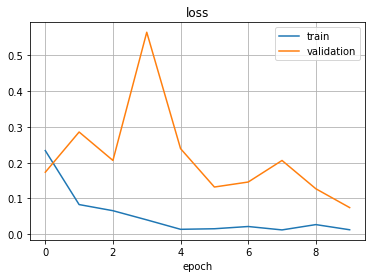

In [35]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.title('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

## 전이 학습을 위한 ResNet50 모델 구축

In [36]:
base_model = ResNet50 (weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [57]:
model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 16)                1605648   
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
Total params: 25,193,394
Trainable params: 25,140,274
Non-trainable params: 53,120
_________________________________________________________________


In [58]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(2e-5), metrics = ['acc'])

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = '.cats_and_dogs_ResNet50_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name, 
                             monitor ='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto'
                             )

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              )

start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                 epochs=10, batch_size=16,
                 validation_data=(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time =>', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 28s 184ms/step - loss: 0.1134 - acc: 0.9580 - val_loss: 0.0810 - val_acc: 0.9740
Epoch 2/10
125/125 [==============================] - 24s 192ms/step - loss: 0.0130 - acc: 0.9970 - val_loss: 0.0848 - val_acc: 0.9700
Epoch 3/10
125/125 [==============================] - 23s 184ms/step - loss: 0.0060 - acc: 0.9990 - val_loss: 0.1029 - val_acc: 0.9680
Epoch 4/10
125/125 [==============================] - 23s 186ms/step - loss: 0.0048 - acc: 0.9990 - val_loss: 0.0797 - val_acc: 0.9740
Epoch 5/10
125/125 [==============================] - 23s 186ms/step - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0854 - val_acc: 0.9720
Epoch 6/10
125/125 [==============================] - 23s 187ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.1111 - val_acc: 0.9720
Epoch 7/10
125/125 [==============================] - 24s 195ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.1191 - val_acc: 0.9720
Epoch 8/10
125/125 [==============================] - 2

In [61]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 2s 94ms/step - loss: 0.0691 - acc: 0.9860


[0.06908439099788666, 0.9860000014305115]

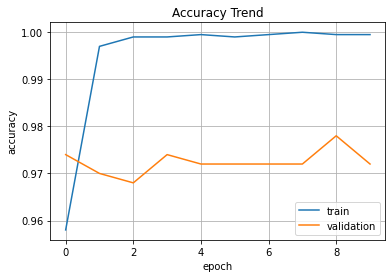

In [62]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

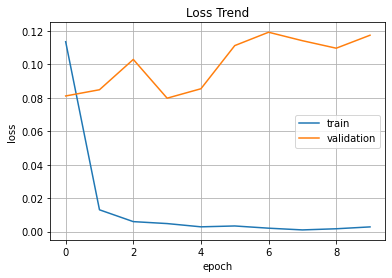

In [63]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

## 전이학습을 위한 Xception 모델 구축

In [64]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [65]:
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 6)                 602118    
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_9 (Dense)             (None, 2)                 14        
                                                                 
Total params: 21,463,612
Trainable params: 21,409,084
Non-trainable params: 54,528
_________________________________________________________________


In [66]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [69]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime 

save_file_name = '/cats_and_dogs_Xception_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name, 
                             monitor = 'val_loss',
                             verbose=1,
                             save_best_only = True,
                             mode='auto'
                             )

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              )

start_time = datetime.now()

hist = model.fit (x_train, y_train, 
                  epochs=10, batch_size=16,
                  validation_data = (x_val, y_val))

end_time = datetime.now()

print('Elapsed Time =>', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 46s 318ms/step - loss: 0.3535 - acc: 0.8495 - val_loss: 0.0628 - val_acc: 0.9740
Epoch 2/10
125/125 [==============================] - 39s 310ms/step - loss: 0.1405 - acc: 0.9505 - val_loss: 0.0559 - val_acc: 0.9720
Epoch 3/10
125/125 [==============================] - 39s 309ms/step - loss: 0.0900 - acc: 0.9665 - val_loss: 0.0493 - val_acc: 0.9740
Epoch 4/10
125/125 [==============================] - 40s 320ms/step - loss: 0.0598 - acc: 0.9810 - val_loss: 0.0371 - val_acc: 0.9840
Epoch 5/10
125/125 [==============================] - 40s 319ms/step - loss: 0.0546 - acc: 0.9805 - val_loss: 0.0461 - val_acc: 0.9820
Epoch 6/10
125/125 [==============================] - 40s 318ms/step - loss: 0.0452 - acc: 0.9815 - val_loss: 0.0443 - val_acc: 0.9780
Epoch 7/10
125/125 [==============================] - 39s 314ms/step - loss: 0.0400 - acc: 0.9880 - val_loss: 0.0493 - val_acc: 0.9760
Epoch 8/10
125/125 [==============================] - 4

In [70]:
model.evaluate (x_test,y_test)

16/16 [==============================] - 5s 193ms/step - loss: 0.0881 - acc: 0.9780


[0.08808185160160065, 0.9779999852180481]

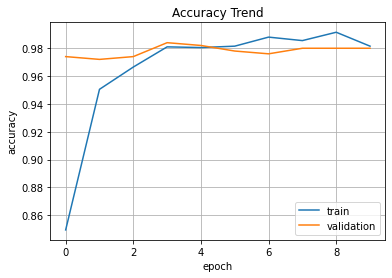

In [71]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()



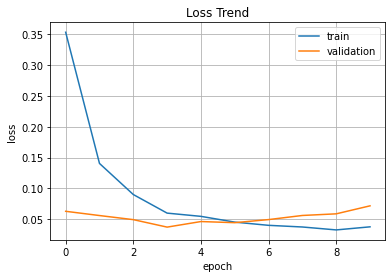

In [72]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc = 'best')
plt.grid()
plt.show() 

## 전이 학습을 위한 InceptionV3 모델 구축

In [73]:
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(224,224,3))
base_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 rmalization)         

In [76]:
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation ='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_10 (Dense)            (None, 16)                819216    
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 22,622,034
Trainable params: 22,587,602
Non-trainable params: 34,432
_________________________________________________________________


In [77]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime


save_file_name = './cats_and_dogs_InceptionV3_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,
                             monitor ='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode ='auto'
                             )

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              )


start_time = datetime.now()

hist=model.fit(x_train, y_train, 
               epochs=10, batch_size=16, 
               validation_data = (x_val,y_val))

end_time = datetime.now()

print('Elapsed Time =>', end_time - start_time)

Epoch 1/10
125/125 [==============================] - 30s 166ms/step - loss: 0.3042 - acc: 0.8565 - val_loss: 0.0729 - val_acc: 0.9680
Epoch 2/10
125/125 [==============================] - 19s 152ms/step - loss: 0.1032 - acc: 0.9670 - val_loss: 0.0771 - val_acc: 0.9640
Epoch 3/10
125/125 [==============================] - 19s 151ms/step - loss: 0.0660 - acc: 0.9775 - val_loss: 0.0842 - val_acc: 0.9660
Epoch 4/10
125/125 [==============================] - 20s 161ms/step - loss: 0.0489 - acc: 0.9830 - val_loss: 0.0910 - val_acc: 0.9560
Epoch 5/10
125/125 [==============================] - 20s 160ms/step - loss: 0.0349 - acc: 0.9875 - val_loss: 0.0805 - val_acc: 0.9680
Epoch 6/10
125/125 [==============================] - 21s 165ms/step - loss: 0.0213 - acc: 0.9950 - val_loss: 0.0988 - val_acc: 0.9700
Epoch 7/10
125/125 [==============================] - 21s 165ms/step - loss: 0.0183 - acc: 0.9930 - val_loss: 0.0912 - val_acc: 0.9680
Epoch 8/10
125/125 [==============================] - 1

In [79]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 4s 159ms/step - loss: 0.0810 - acc: 0.9720


[0.08099956810474396, 0.972000002861023]

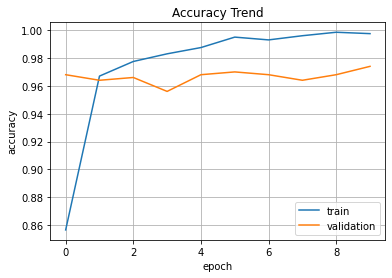

In [80]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation') 
plt.title ('Accuracy Trend') 
plt.ylabel ('accuracy') 
plt.xlabel ('epoch') 
plt.legend (loc = 'best') 

plt.grid()
plt.show()

AttributeError: ignored

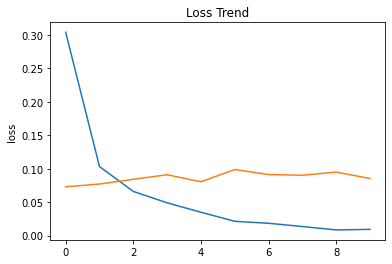

In [81]:
plt.plot(hist.history['loss'], label='train') 
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend') 
plt.ylabel('loss') 
plt.xlable('epoch')
plt.legend(loc='best') 
plt.grid()
plt.show() 